# Story Remix: Spotify Popular Songs and Artists

This data story remixes an existing data story found on kaggle.com, which explores Spotify's all time data on popular songs and artists. Some of the data also comes from Apple Music. I went slightly more in depth in my analysis than the original data story. The original data story and the Spotify dataset came from: https://www.kaggle.com/code/arnavvvvv/spotify-popular-songs-and-artists

## My question: Which artists/songs are most popular on Spotify or Apple Music, and why might they be popular?

### Uploading Data
First, upload the data. This data comes from the source listed above.

In [ ]:
import pandas as pd
file_path = '/content/Spotify Music.csv'
df = pd.read_csv(file_path, encoding = 'latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

This code shows what aspects of the data I can explore to answer my question.

### Visualization 1: Top Artists by Spotify Chart Appearances
I first decided to find which artists may be most popular by finding the top artists across Spotify charts. I created a bar chart in Tableau, with artist names as rows and in Spotify charts as the columns.


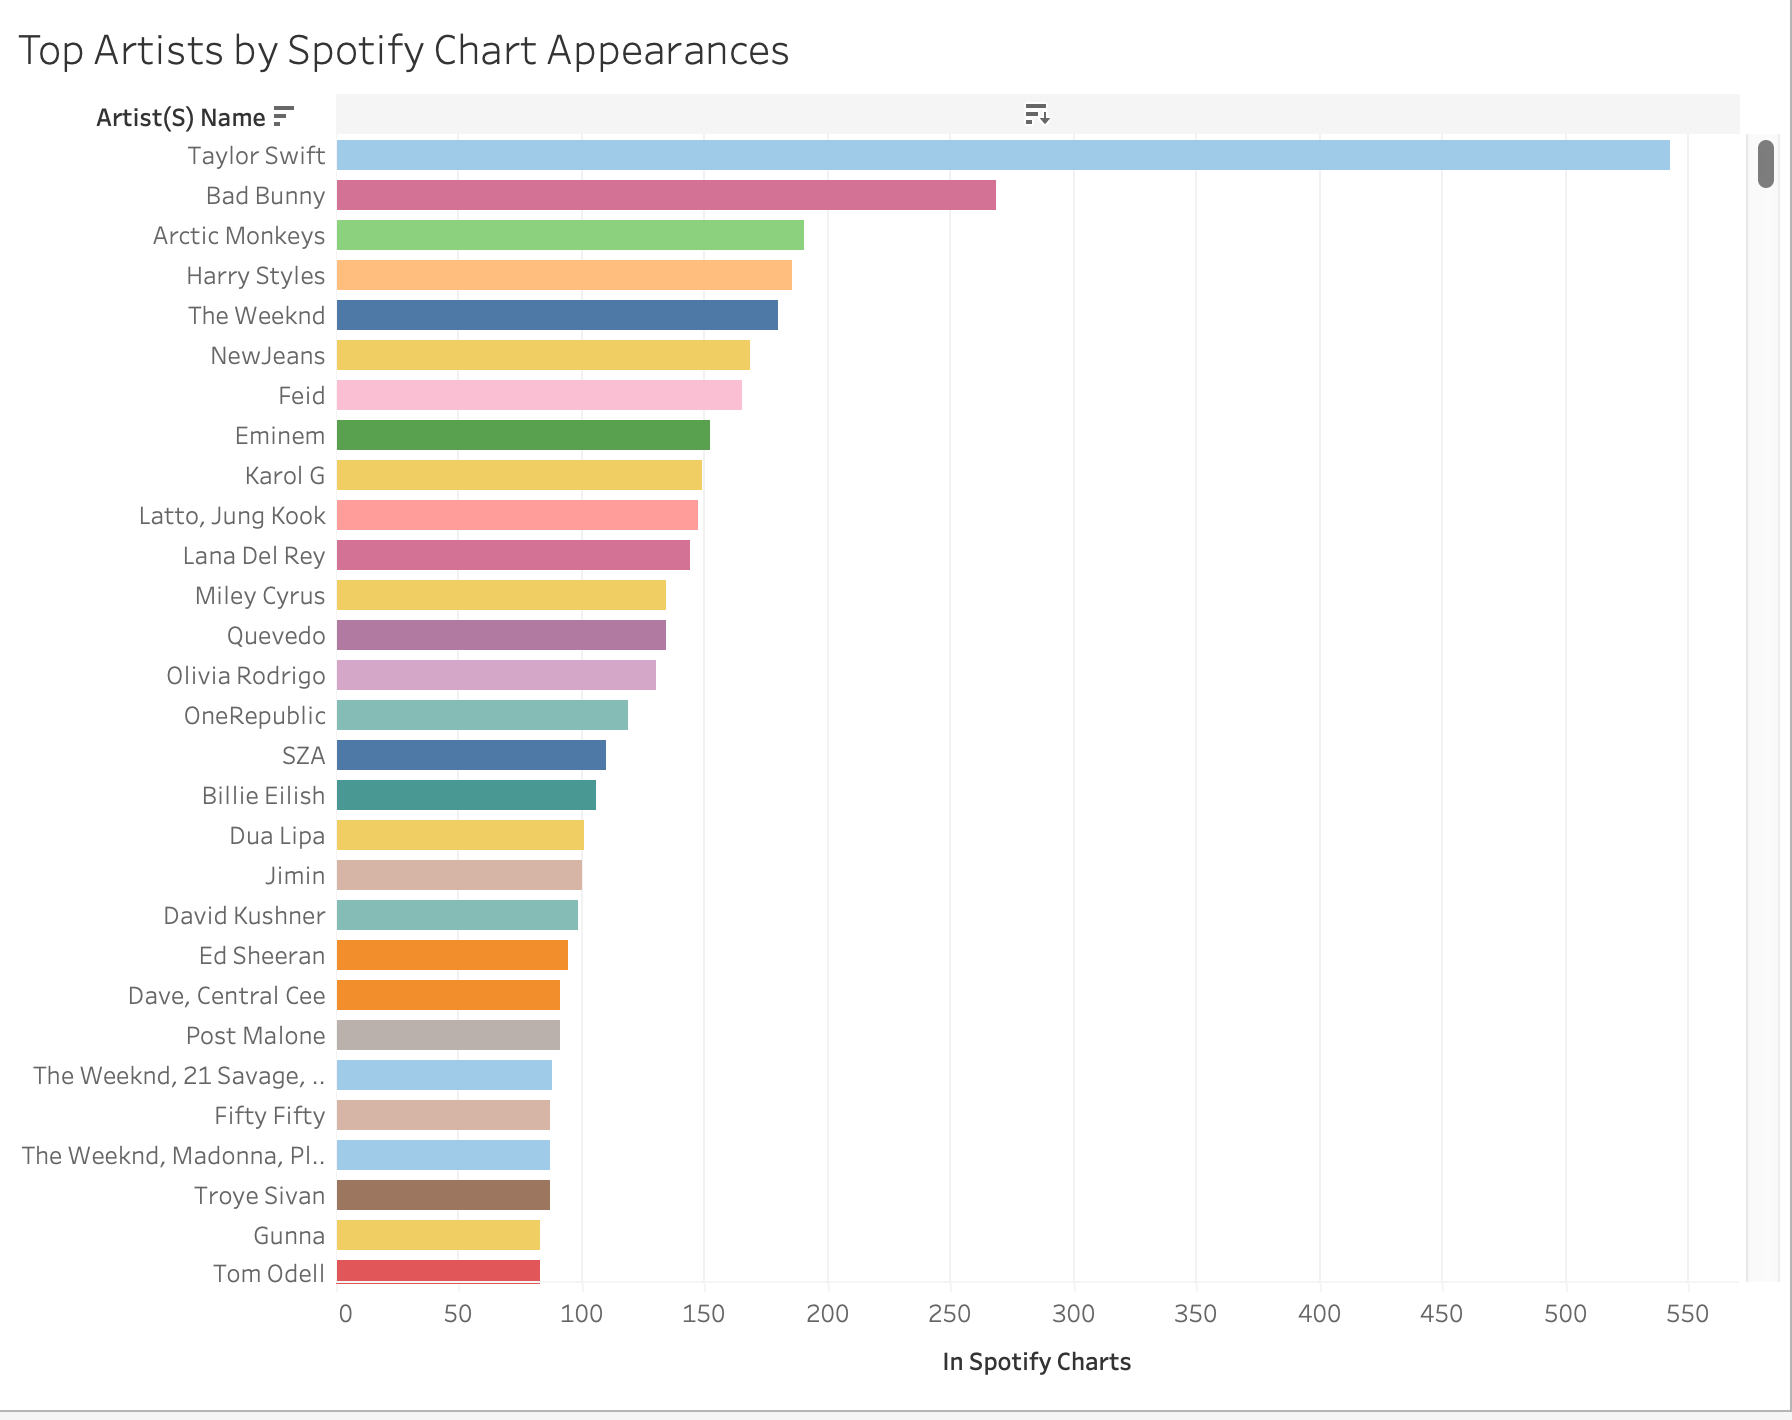


I sorted this bar graph by top artists in Spotify charts in ascending order. We can see that Taylor Swift, Bad Bunny, and Arctic Monkeys are the top three artists featured in Spotify charts, which helps to answer my question.

### Visualization 2: Songs by Danceability and Energy

Next, I wanted to explore the different characteristics of songs. I used Altair to plot the danceability and energy columns, sized by their position on Spotify charts, to visualize whether danceability and energy has an effect on charting and popularity. Each bubble is able to be hovered over to show the song title, danceability, energy, and chart ranking.

In [ ]:
import altair as alt

bubble_chart = alt.Chart(df).mark_circle().encode(
    x='danceability_%:Q',
    y='energy_%:Q',
    size='in_spotify_charts:Q',
    color='track_name:N',
    tooltip=['track_name:N', 'danceability_%:Q', 'energy_%:Q', 'in_spotify_charts:Q']
).properties(
    title='Songs by Danceability and Energy, Sized by Spotify Chart Position',
    width=600,
    height=400
)

bubble_chart.display()

alt.Chart(...)

From the bubble chart, it is clear that most charting songs are moderately danceable and energetic. However, danceability and energy are not characteristics that guarantee or suggest popularity. We also get an idea, based on the size of the bubbles, of the top charting songs.

### Visualization 3: Correlation Matrix
One final way to explore this question is to examine correlation between the data to help explain Spotify popularity.

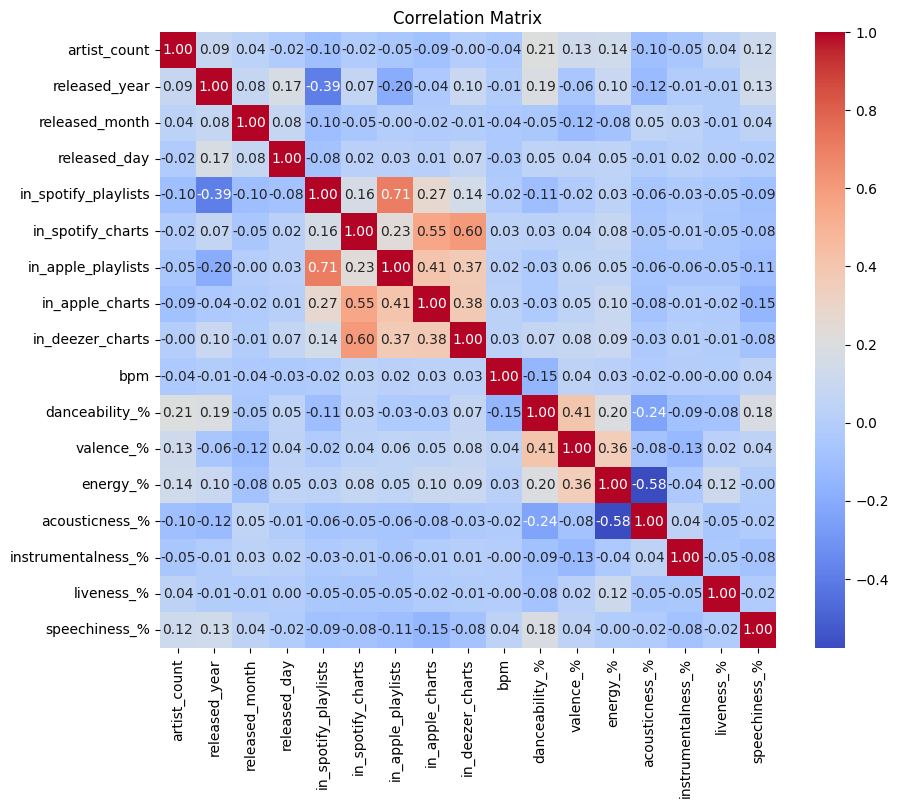

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square = True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Based on this heatmap, I can see a positive correlation between Apple Music playlists & charts, as well as Spotify playlists & charts. Therefore, songs in Spotify or Apple Music playlists also tend to be charting on Spotify or Apple Music. These music platforms might see songs begin to chart and add them to these playlists. Additionally, being added to a playlist might help songs get more streams due to increased visibility.

### Conclusion

From these visualizations, we have found which artists are the highest charting on Spotify. We also gained insight into song characteristics to get a glimpse into why a song might be charting. Finally, we found correlations between playlists and charts to explain possible reasons for popularity.